In [1]:
import os
import torch
import torchvision
import tarfile
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split

c:\Users\acer predator\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
dataset='medical'
classes=os.listdir(dataset)
print(classes)

['AbdomenCT', 'BreastMRI', 'ChestCT', 'CXR', 'Hand', 'HeadCT']


In [8]:
file1=os.listdir(dataset+"/AbdomenCT")
print(len(file1))
print(file1[:5])

10000
['000000.jpeg', '000001.jpeg', '000002.jpeg', '000003.jpeg', '000004.jpeg']


In [9]:
file2=os.listdir(dataset+"/BreastMRI")
print(len(file2))
print(file2[:5])


8954
['000000.jpeg', '000001.jpeg', '000002.jpeg', '000003.jpeg', '000004.jpeg']


In [10]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

In [11]:
dataset=ImageFolder(dataset , transform=ToTensor())

In [12]:
len(dataset)

58954

In [29]:
img , label = dataset[0]
print(img.shape , label)
img


torch.Size([3, 64, 64]) 0


tensor([[[0.3961, 0.3961, 0.3961,  ..., 0.3961, 0.3961, 0.3961],
         [0.3961, 0.3961, 0.3961,  ..., 0.3961, 0.3961, 0.3961],
         [0.3961, 0.3961, 0.3961,  ..., 0.3961, 0.3961, 0.3961],
         ...,
         [0.3961, 0.3961, 0.3961,  ..., 0.3961, 0.3961, 0.3961],
         [0.3961, 0.3961, 0.3961,  ..., 0.3961, 0.3961, 0.3961],
         [0.3961, 0.3961, 0.3961,  ..., 0.3961, 0.3961, 0.3961]],

        [[0.3961, 0.3961, 0.3961,  ..., 0.3961, 0.3961, 0.3961],
         [0.3961, 0.3961, 0.3961,  ..., 0.3961, 0.3961, 0.3961],
         [0.3961, 0.3961, 0.3961,  ..., 0.3961, 0.3961, 0.3961],
         ...,
         [0.3961, 0.3961, 0.3961,  ..., 0.3961, 0.3961, 0.3961],
         [0.3961, 0.3961, 0.3961,  ..., 0.3961, 0.3961, 0.3961],
         [0.3961, 0.3961, 0.3961,  ..., 0.3961, 0.3961, 0.3961]],

        [[0.3961, 0.3961, 0.3961,  ..., 0.3961, 0.3961, 0.3961],
         [0.3961, 0.3961, 0.3961,  ..., 0.3961, 0.3961, 0.3961],
         [0.3961, 0.3961, 0.3961,  ..., 0.3961, 0.3961, 0.

In [14]:
print(dataset.classes)

['AbdomenCT', 'BreastMRI', 'CXR', 'ChestCT', 'Hand', 'HeadCT']


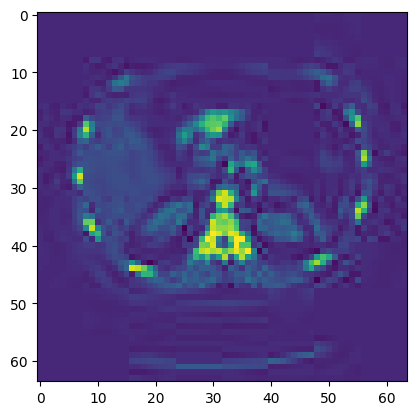

In [16]:
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(img[0])

In [17]:
def show_eg(img , label):
    print(dataset.classes[label] ,"("+str(label)+")")
    plt.imshow(img.permute(1,2,0))

In [21]:
from torch.utils.data import SubsetRandomSampler
from torch.utils.data import DataLoader
import numpy as np

In [22]:
def split_indices(n , per):
    val_size=int(n*per)
    perm = np.random.permutation(n)
    return perm[val_size:] , perm[:val_size]

In [23]:
tr_set , vl_set = split_indices(len(dataset) , per= 0.1)
print(len(tr_set) , len(vl_set))
print(tr_set[:3])

53059 5895
[44292 10296 54224]


In [75]:
batch=100
train_dataset=SubsetRandomSampler(tr_set)
train_dl=DataLoader(dataset , batch , sampler=train_dataset)
valid_dataset=SubsetRandomSampler(vl_set)
valid_dl=DataLoader(dataset , batch , sampler=valid_dataset)

In [79]:
for images, labels in train_dl:
    print(images.shape)
    inputs=images.reshape(-1 , 12288)
    print(inputs.shape)
    break

torch.Size([100, 3, 64, 64])
torch.Size([100, 12288])


In [80]:
inputs_size=inputs.shape[-1]
hidden_size=128

In [81]:
import torch.nn as nn
import torch.nn.functional as F

In [82]:
import torch.nn.functional as F
layer1=nn.Linear(inputs_size , hidden_size)

In [90]:
inputs.shape

torch.Size([100, 12288])

In [84]:
layer1_output=inputs @layer1.weight.t() +layer1.bias
layer1_output.shape

torch.Size([100, 128])

In [92]:
#using relu to remove linearity
relu_output=F.relu(layer1_output)
print(torch.min(layer1_output).item() , torch.min(relu_output).item())

-1.1461358070373535 0.0


In [93]:
output_size=6
layer2=nn.Linear(hidden_size , output_size)

In [97]:
layer2_outputs = layer2(relu_output)
print(layer2_outputs.shape)

torch.Size([100, 6])


In [98]:
F.cross_entropy(layer2_outputs, labels)

tensor(1.8206, grad_fn=<NllLossBackward0>)

In [95]:
from torchvision.utils import make_grid

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        break

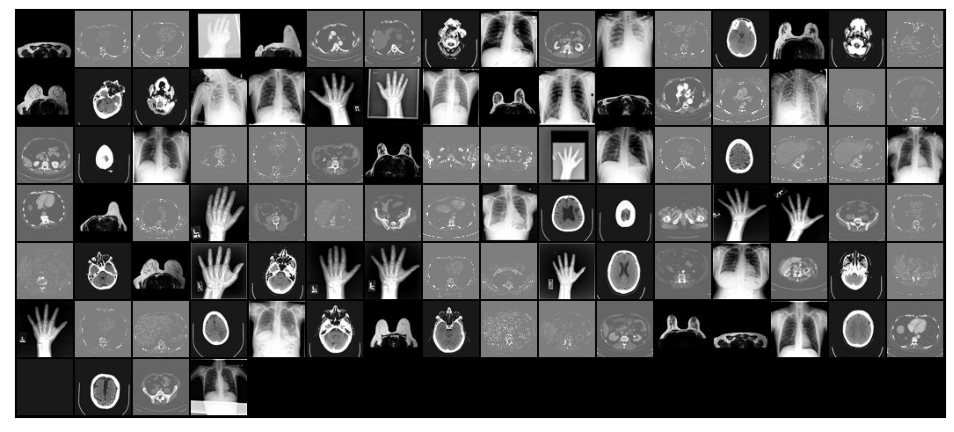

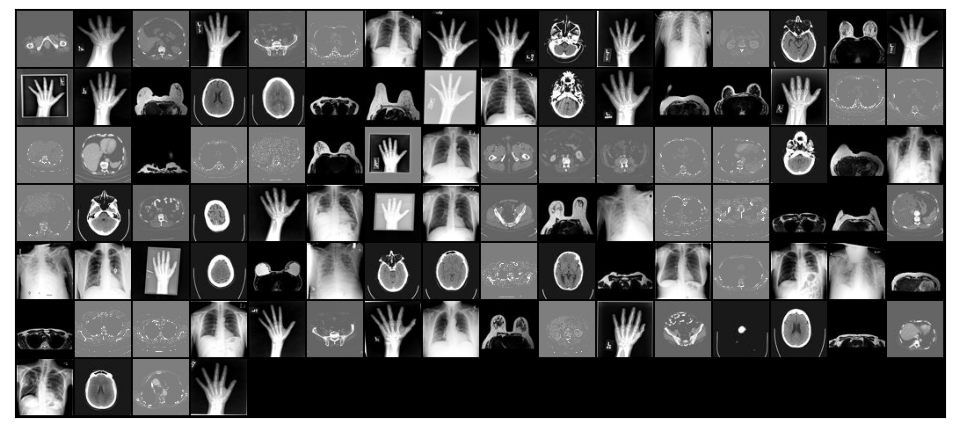

In [96]:
show_batch(train_dl)
show_batch(valid_dl)

In [27]:
#convolutional neural network model; 